# Problem Statement

### Our job here is to predict the salary of employees from their performances. Our goal here is to make and train a machine learning model which will read the data of the previous salary and predict the salary of the employee with utmost accuracy using several python libraries like Pandas, Numpy, Seaborn and machine learning algorithms.

## Solution - 

#### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#### Importing the dataset

In [2]:
df = pd.read_csv('C:/Users/Personal/Employee Salary Prediction Using Machine Learning Project/salary_predict_dataset.csv', header=0)

In [3]:
X = df.drop('Salary', axis=1)
y = df['Salary']

#### Data Preprocessing

In [4]:
#Imputing the Nan values with the mean value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X.iloc[:,1:]) #identifies the missing values
X.iloc[:,1:] = imputer.transform(X.iloc[:, 1:]) #replaces the missing values with the mean. 
print(X)

    experience  test_score  interview_score
0          NaN    8.000000         8.000000
1          NaN    5.000000         4.000000
2          3.0    6.000000         5.000000
3          5.0    9.000000         9.000000
4          6.0    3.000000         5.000000
5          NaN    2.000000         1.000000
6         10.0    8.000000         6.000000
7          1.0    1.000000         2.000000
8         15.0    9.000000         9.000000
9         13.0    7.500000         7.500000
10        10.0    5.447368         5.000000
11         NaN    1.000000         1.000000
12         1.0    3.000000         6.000000
13         4.0    5.000000         4.000000
14         6.0    5.000000         5.657895
15        11.0    9.000000         8.000000
16        12.0    9.000000         9.000000
17         NaN    2.000000         6.000000
18         3.0    5.000000         5.000000
19         5.0    6.000000         7.000000


#### Data Visualization

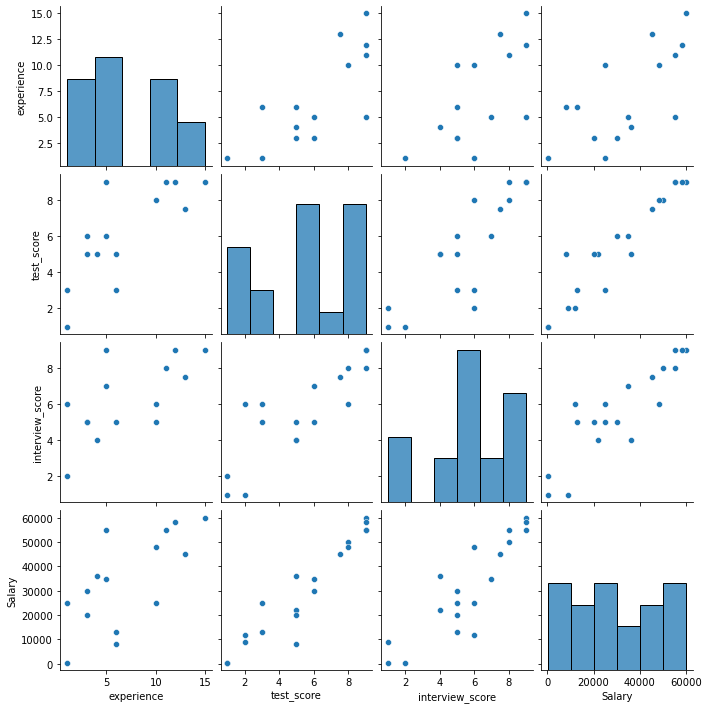

In [5]:
sns.pairplot(df)

In [6]:
df.describe()

,experience,test_score,interview_score,Salary
count,15.000000,19.000000,19.000000,20.000000
mean,7.000000,5.447368,5.657895,30350.000000
std,4.488079,2.832817,2.516902,19780.439567
min,1.000000,1.000000,1.000000,500.000000
25%,3.500000,3.000000,4.500000,12750.000000
50%,6.000000,5.000000,6.000000,27500.000000
75%,10.500000,8.000000,7.750000,48500.000000
max,15.000000,9.000000,9.000000,60000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       15 non-null     float64
 1   test_score       19 non-null     float64
 2   interview_score  19 non-null     float64
 3   Salary           20 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 768.0 bytes


In [8]:
df.corr()

,experience,test_score,interview_score,Salary
experience,1.000000,0.770349,0.659668,0.683377
test_score,0.770349,1.000000,0.854358,0.947761
interview_score,0.659668,0.854358,1.000000,0.882128
Salary,0.683377,0.947761,0.882128,1.000000


In [9]:
#dropping the experience column
X.drop(columns = ['experience'], inplace = True)
print(X)

    test_score  interview_score
0     8.000000         8.000000
1     5.000000         4.000000
2     6.000000         5.000000
3     9.000000         9.000000
4     3.000000         5.000000
5     2.000000         1.000000
6     8.000000         6.000000
7     1.000000         2.000000
8     9.000000         9.000000
9     7.500000         7.500000
10    5.447368         5.000000
11    1.000000         1.000000
12    3.000000         6.000000
13    5.000000         4.000000
14    5.000000         5.657895
15    9.000000         8.000000
16    9.000000         9.000000
17    2.000000         6.000000
18    5.000000         5.000000
19    6.000000         7.000000


#### Splitting of the data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train)

    test_score  interview_score
10    5.447368         5.000000
17    2.000000         6.000000
6     8.000000         6.000000
13    5.000000         4.000000
4     3.000000         5.000000
2     6.000000         5.000000
5     2.000000         1.000000
14    5.000000         5.657895
9     7.500000         7.500000
7     1.000000         2.000000
16    9.000000         9.000000
11    1.000000         1.000000
3     9.000000         9.000000
0     8.000000         8.000000
15    9.000000         8.000000
12    3.000000         6.000000


#### Model Selection

In [11]:
from sklearn.linear_model import LinearRegression
#creating model object
lm = LinearRegression()
#fitting the model object in the model
lm.fit(X, y)

LinearRegression()

#### Prediction

In [12]:
y_pred = lm.predict(X_test)

In [13]:
print(y_pred)

[26896.89712319 25588.76908714 35308.13604338 55309.34065973]


#### Validation and Model Accuracy

In [14]:
#using r2_score method
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("The accuracy of the model is ", score*100, "%")

The accuracy of the model is  91.88161432442143 %


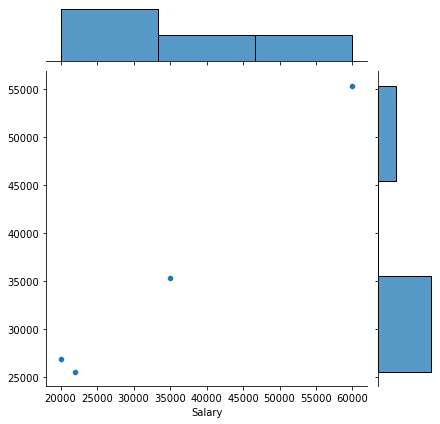

In [15]:
sns.jointplot(x=y_test, y=y_pred)

## End